# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    params = {
        'q': city,
        'appid': weather_api_key,
        'units': 'metric'
    }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(url, params=params)
    
    try:
        # Parse the JSON and retrieve data
        data = response.json()
        #print(data)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        #print(f"Weather data for {city}, {city_country}:")
        #print(f"Latitude: {city_lat}, Longitude: {city_lng}")
        #print(f"Max Temperature: {city_max_temp}")
        #print(f"Humidity: {city_humidity}")
        #print(f"Clouds: {city_clouds}%")
        #print(f"Wind: {city_wind}%")
        #print(f"Date: {city_date}")
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"Error: Unable to fetch weather data for {city}. Status code: {response.status_code}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hood river
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | torghay
Processing Record 4 of Set 1 | port saint john's
Processing Record 5 of Set 1 | yagry
Error: Unable to fetch weather data for yagry. Status code: 404
Processing Record 6 of Set 1 | ta`u
Processing Record 7 of Set 1 | taiohae
Error: Unable to fetch weather data for taiohae. Status code: 404
Processing Record 8 of Set 1 | los chavez
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | sao gabriel da cachoeira
Processing Record 13 of Set 1 | carauari
Processing Record 14 of Set 1 | hachinohe
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | san fernando
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | masons bay
Error: Unable to fetch weather data for mas

Processing Record 32 of Set 4 | vadso
Processing Record 33 of Set 4 | novodvinsk
Processing Record 34 of Set 4 | taltal
Processing Record 35 of Set 4 | mersa matruh
Processing Record 36 of Set 4 | orenburg
Processing Record 37 of Set 4 | mount pearl
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | sinop
Processing Record 41 of Set 4 | kadnikov
Processing Record 42 of Set 4 | takamaka
Error: Unable to fetch weather data for takamaka. Status code: 404
Processing Record 43 of Set 4 | akureyri
Processing Record 44 of Set 4 | cargados carajos
Error: Unable to fetch weather data for cargados carajos. Status code: 404
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | guixi
Processing Record 47 of Set 4 | hermanus
Processing Record 48 of Set 4 | correntina
Processing Record 49 of Set 4 | haiku-pauwela
Processing Record 0 of Set 5 | checker hall
Error: Unable to fetch weather data for checker hall. Status c

Processing Record 11 of Set 8 | berdigestyakh
Processing Record 12 of Set 8 | grande prairie
Processing Record 13 of Set 8 | yakeshi
Processing Record 14 of Set 8 | tolanaro
Processing Record 15 of Set 8 | nizhnyaya tavda
Processing Record 16 of Set 8 | rabaul
Processing Record 17 of Set 8 | qarazhal
Processing Record 18 of Set 8 | tranovaho
Error: Unable to fetch weather data for tranovaho. Status code: 404
Processing Record 19 of Set 8 | howard springs
Processing Record 20 of Set 8 | belleville
Processing Record 21 of Set 8 | coron
Processing Record 22 of Set 8 | puerto san carlos
Error: Unable to fetch weather data for puerto san carlos. Status code: 404
Processing Record 23 of Set 8 | luderitz
Processing Record 24 of Set 8 | sinabang
Processing Record 25 of Set 8 | sao vicente
Processing Record 26 of Set 8 | fortuna
Processing Record 27 of Set 8 | glace bay
Processing Record 28 of Set 8 | razole
Processing Record 29 of Set 8 | antigua
Processing Record 30 of Set 8 | turbat
Processi

Processing Record 41 of Set 11 | saint-philippe
Processing Record 42 of Set 11 | marshall
Processing Record 43 of Set 11 | shorapur
Processing Record 44 of Set 11 | shambu
Processing Record 45 of Set 11 | kaiapoi
Processing Record 46 of Set 11 | wad rawah
Processing Record 47 of Set 11 | santo antonio do ica
Processing Record 48 of Set 11 | komsomol'skiy
Processing Record 49 of Set 11 | hirara
Processing Record 0 of Set 12 | bardai
Processing Record 1 of Set 12 | shakiso
Processing Record 2 of Set 12 | les cayes
Processing Record 3 of Set 12 | lakhnadon
Processing Record 4 of Set 12 | fale old settlement
Processing Record 5 of Set 12 | porto novo
Processing Record 6 of Set 12 | hastings
Processing Record 7 of Set 12 | amursk
Processing Record 8 of Set 12 | kidal
Processing Record 9 of Set 12 | dryden
Processing Record 10 of Set 12 | merikanjaka
Error: Unable to fetch weather data for merikanjaka. Status code: 404
Processing Record 11 of Set 12 | rondonopolis
Processing Record 12 of Set

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#print(city_data_df)
    
# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hood river,45.7054,-121.5215,14.89,61,100,3.13,US,1684812953
1,port-aux-francais,-49.3500,70.2167,6.69,98,97,13.41,TF,1684812953
2,torghay,49.6339,63.4981,21.34,34,1,5.89,KZ,1684812953
3,port saint john's,-31.6229,29.5448,13.64,78,72,3.26,ZA,1684812953
4,ta`u,-14.2336,-169.5144,27.42,81,10,6.08,AS,1684812954


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hood river,45.7054,-121.5215,14.89,61,100,3.13,US,1684812953
1,port-aux-francais,-49.3500,70.2167,6.69,98,97,13.41,TF,1684812953
2,torghay,49.6339,63.4981,21.34,34,1,5.89,KZ,1684812953
3,port saint john's,-31.6229,29.5448,13.64,78,72,3.26,ZA,1684812953
4,ta`u,-14.2336,-169.5144,27.42,81,10,6.08,AS,1684812954


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

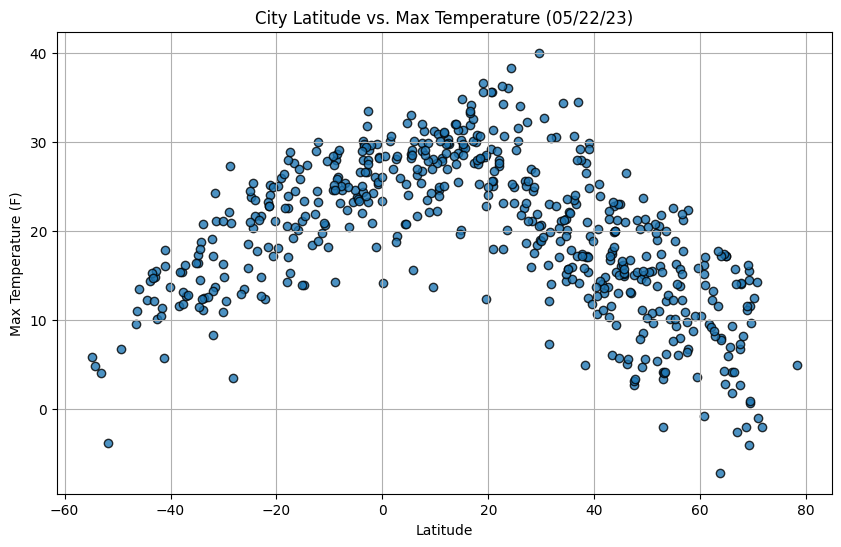

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# add title and labels to the axes
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

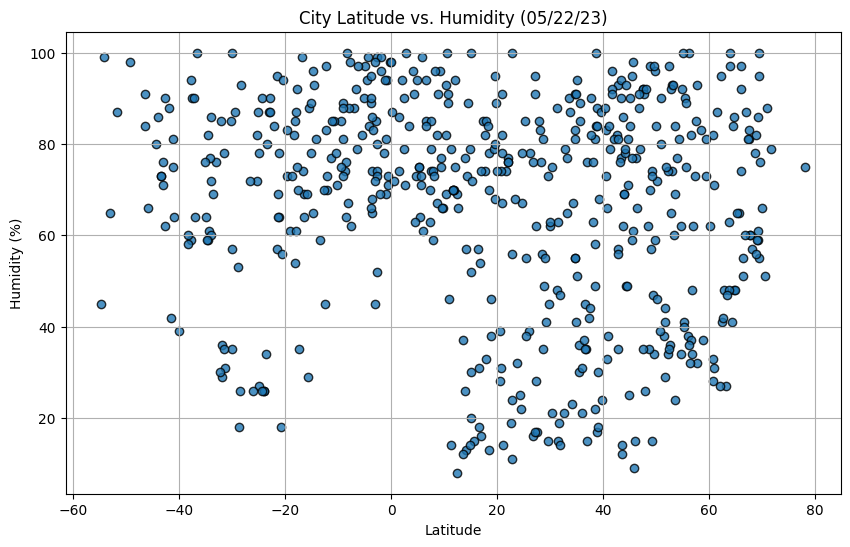

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# add title and labels to the axes
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig2.png")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

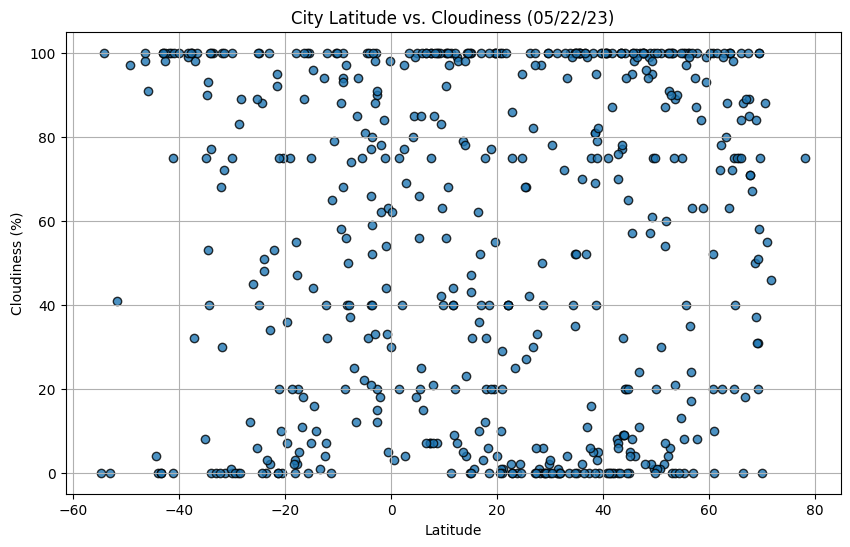

In [14]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# add title and labels to the axes
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

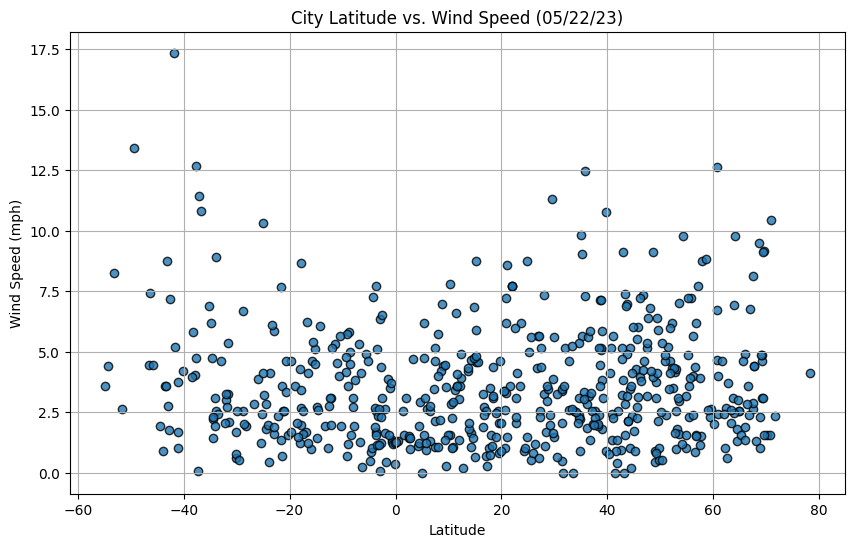

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# add title and labels to the axes
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.0824162751581709


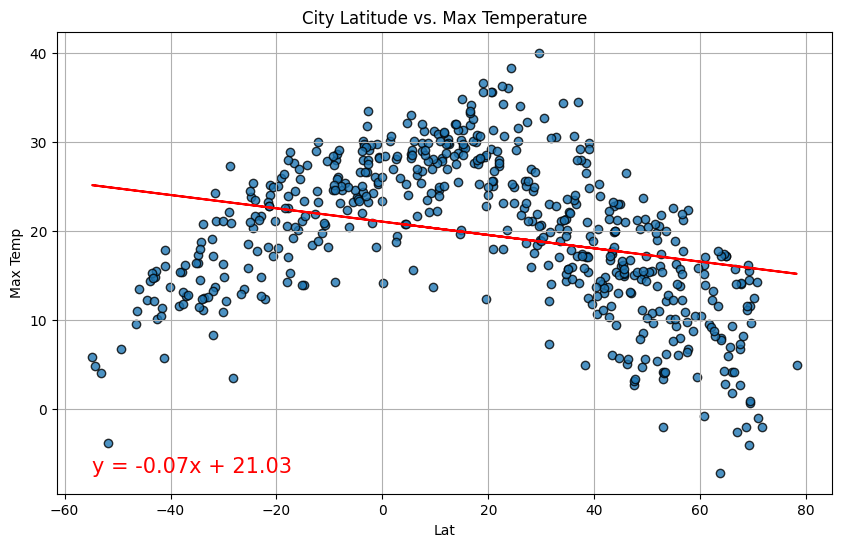

In [16]:
# Define a function to create Linear Regression plots

import seaborn as sns
from scipy.stats import linregress

def create_linear_regression_plot(df, x_column, y_column, title, file_name):
    # create a scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(df[x_column], df[y_column], edgecolor='black', linewidths=1, marker='o', alpha=0.8)

    # add title and labels to the axes
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)

    # perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(df[x_column], df[y_column])

    # create equation of line
    regress_values = df[x_column] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # create line plot for regression
    plt.plot(df[x_column], regress_values, "r-")
    plt.annotate(line_eq,(df[x_column].min(),df[y_column].min()),fontsize=15,color="red")

    print(f"The r-value is: {r_value**2}")

    # save the figure
    plt.savefig(file_name)

    # show plot
    plt.show()

# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# call the function with the required parameters
create_linear_regression_plot(city_data_df, 'Lat', 'Max Temp', 'City Latitude vs. Max Temperature', 'output_data/Fig1.png')


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude >= 0
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample Data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hood river,45.7054,-121.5215,14.89,61,100,3.13,US,1684812953
2,torghay,49.6339,63.4981,21.34,34,1,5.89,KZ,1684812953
5,los chavez,34.7270,-106.7384,21.35,55,52,2.38,US,1684812954
6,iqaluit,63.7506,-68.5145,-7.15,63,100,3.09,CA,1684812955
11,hachinohe,40.5000,141.5000,10.66,73,100,4.14,JP,1684812956


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude < 0
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.69,98,97,13.41,TF,1684812953
3,port saint john's,-31.6229,29.5448,13.64,78,72,3.26,ZA,1684812953
4,ta`u,-14.2336,-169.5144,27.42,81,10,6.08,AS,1684812954
7,port elizabeth,-33.9180,25.5701,11.16,86,0,2.57,ZA,1684812955
8,acarau,-2.8856,-40.1200,26.62,85,100,6.36,BR,1684812955


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5658287049121783


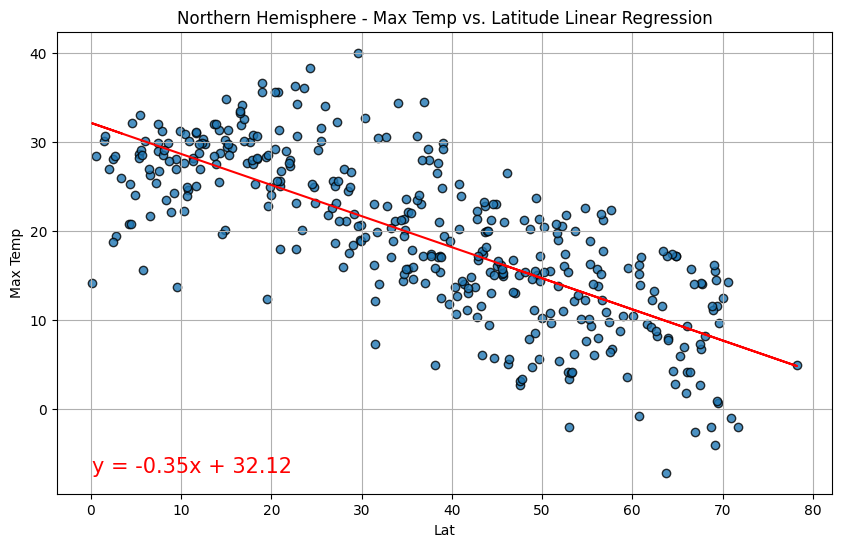

In [20]:
# Linear regression on Northern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude >= 0
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# call the function with the required parameters
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'output_data/Northern_Max_Temp_vs_Lat.png')


The r-value is: 0.6318248557815165


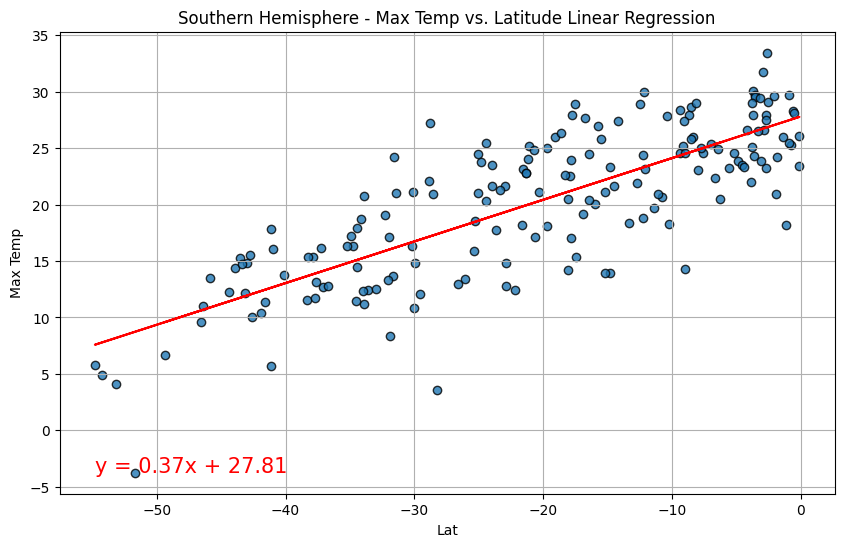

In [21]:
# Linear regression on Southern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude < 0
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# call the function with the required parameters
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'output_data/Southern_Max_Temp_vs_Lat.png')


**Discussion about the linear relationship:** Latitude vs. Temperature: There's a strong correlation between latitude and temperature. In the Northern Hemisphere, as you move away from the equator (latitude increases), the temperature tends to decrease. The opposite is often observed in the Southern Hemisphere, where temperature tends to increase as you approach the equator (latitude increases). This pattern reflects the fact that the equator receives the most sunlight and hence has higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00038201139171985694


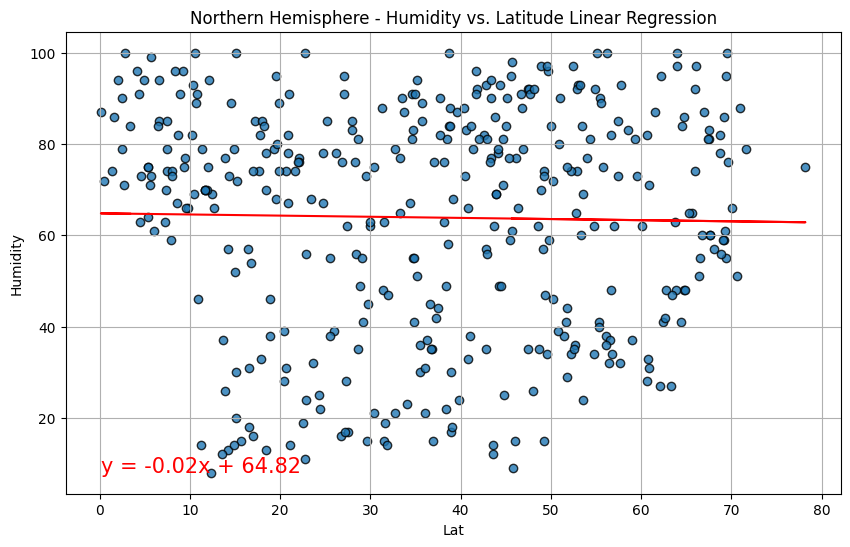

In [22]:
# Northern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude >= 0
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# call the function with the required parameters
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 'output_data/Northern_Humidity_vs_Lat.png')


The r-value is: 0.04996960295347839


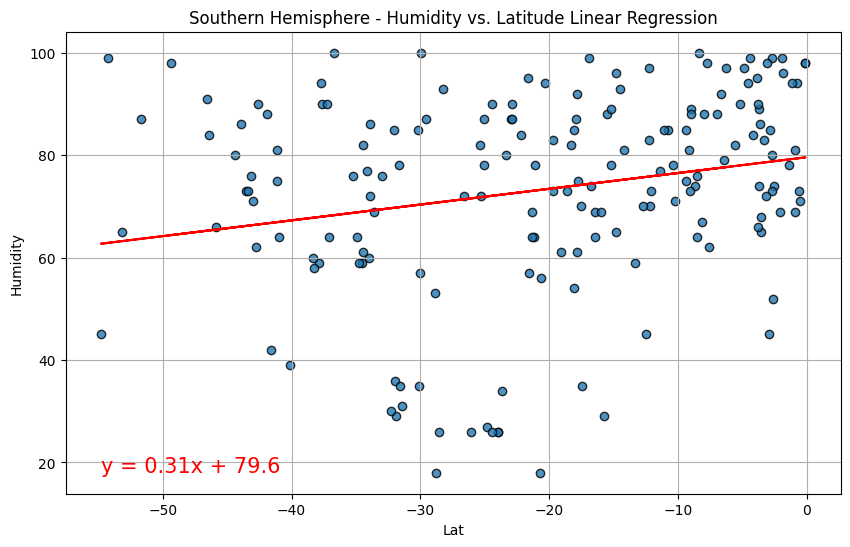

In [23]:
# Southern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude < 0
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# call the function with the required parameters
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 'output_data/Southern_Humidity_vs_Lat.png')


**Discussion about the linear relationship:** The relationship between latitude and humidity isn't typically as strong as with temperature. However, it's common to observe high humidity levels near the equator due to warm temperatures leading to high rates of evaporation, which is common in the tropical countries located closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009609177189006947


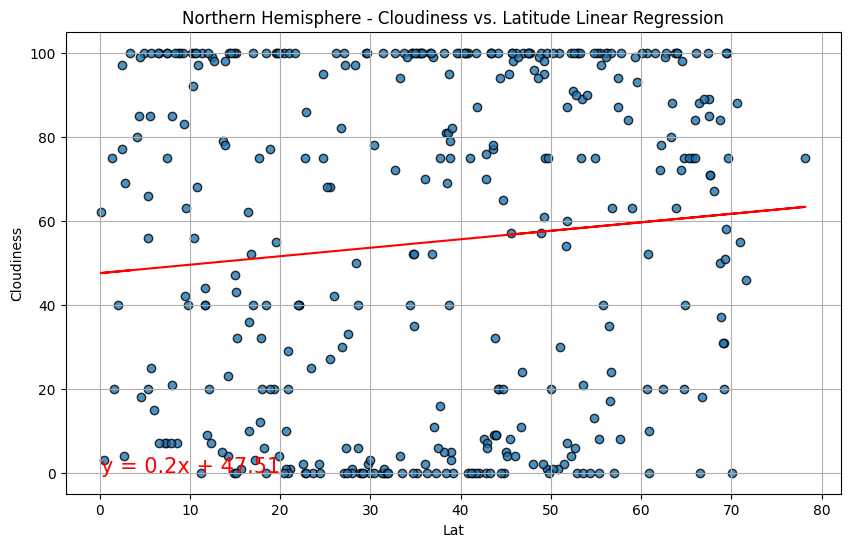

In [24]:
# Northern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude >= 0
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# call the function with the required parameters
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'output_data/Northern_Cloudiness_vs_Lat.png')


The r-value is: 0.0023043868390178277


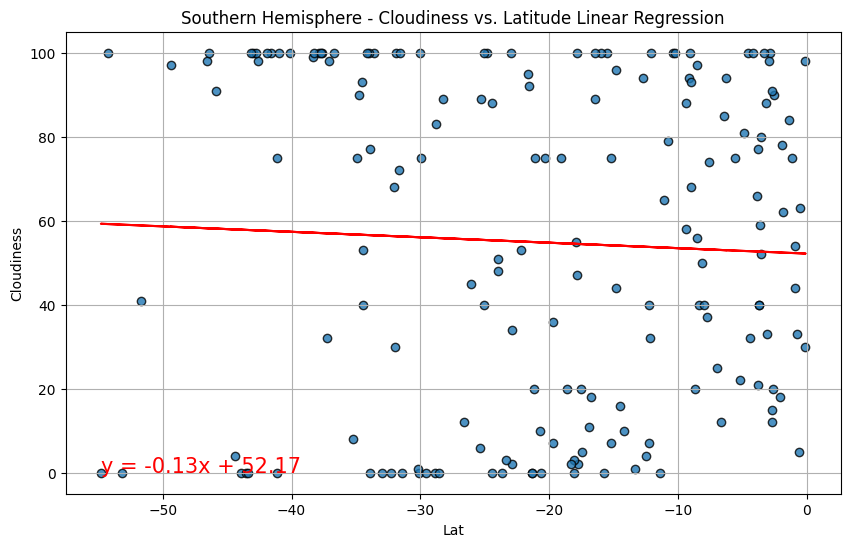

In [25]:
# Southern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude < 0
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# call the function with the required parameters
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'output_data/Southern_Cloudiness_vs_Lat.png')


**Discussion about the linear relationship:**  There isn't a strong and consistent relationship between latitude and cloudiness. Cloud formation is influenced by many other local factors such as terrain, altitude, and proximity to bodies of water.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02484323164136629


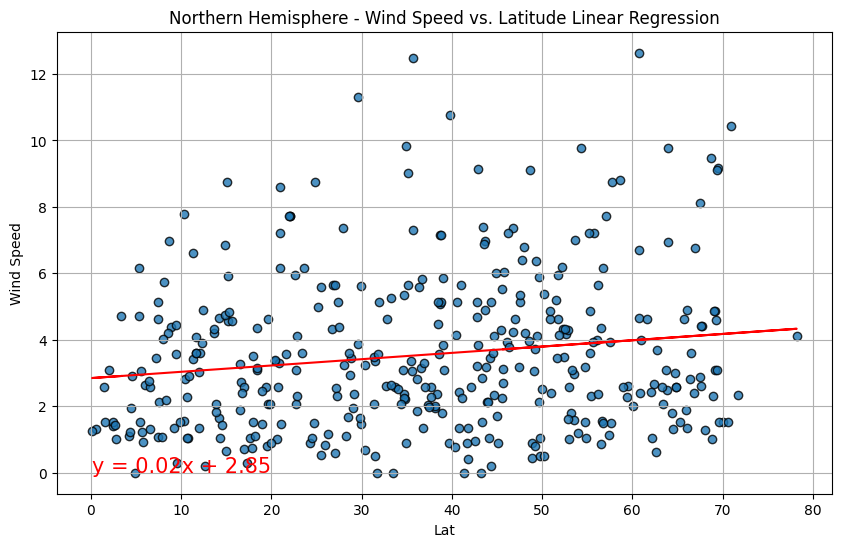

In [26]:
# Northern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude >= 0
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# call the function with the required parameters
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'output_data/Northern_Wind_Speed_vs_Lat.png')


The r-value is: 0.08164976163680965


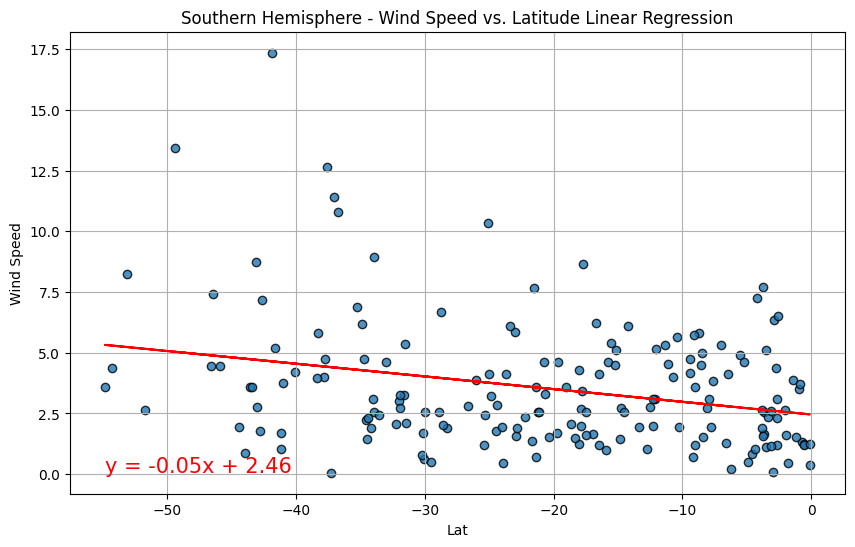

In [27]:
# Southern Hemisphere
# read the CSV file into a DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# create a new DataFrame with only the rows where Latitude < 0
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# call the function with the required parameters
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'output_data/Southern_Wind_Speed_vs_Lat.png')


**Discussion about the linear relationship:** Wind speeds don't usually show a clear correlation with latitude. While some areas close to the poles might experience higher wind speeds due to global wind patterns, local geography plays a significant role in influencing wind conditions.